In [10]:
# KDD

# import
import pandas as pd
from sklearn.utils import resample


def preprocess_kdd(kdd: pd.DataFrame):
    # number of rows where Class_benign is 1
    num_benign = kdd[kdd['Class_benign'] == 1].shape[0]

    # use sklearn resample to balance the dataset
    kdd_benign = kdd[kdd['Class_benign'] == 1]
    kdd_u2r = kdd[kdd['Class_u2r'] == 1]
    kdd_r2l = kdd[kdd['Class_r2l'] == 1]
    kdd_probe = kdd[kdd['Class_probe'] == 1]
    kdd_dos = kdd[kdd['Class_dos'] == 1]

    kdd_u2r = resample(kdd_u2r, replace=True, n_samples=num_benign, random_state=42)
    kdd_r2l = resample(kdd_r2l, replace=True, n_samples=num_benign, random_state=42)
    kdd_probe = resample(kdd_probe, replace=True, n_samples=num_benign, random_state=42)
    kdd_dos = resample(kdd_dos, replace=True, n_samples=num_benign, random_state=42)
    
    kdd = pd.concat([kdd_benign, kdd_u2r, kdd_r2l, kdd_probe, kdd_dos])

    return kdd


kdd_train = pd.read_csv('../artefacts/3/kdd_train.csv')
kdd_train = preprocess_kdd(kdd_train)
kdd_train.to_csv('../artefacts/5/kdd_train.csv', index=False)

kdd_test = pd.read_csv('../artefacts/3/kdd_test.csv')
kdd_test.to_csv('../artefacts/5/kdd_test.csv', index=False)


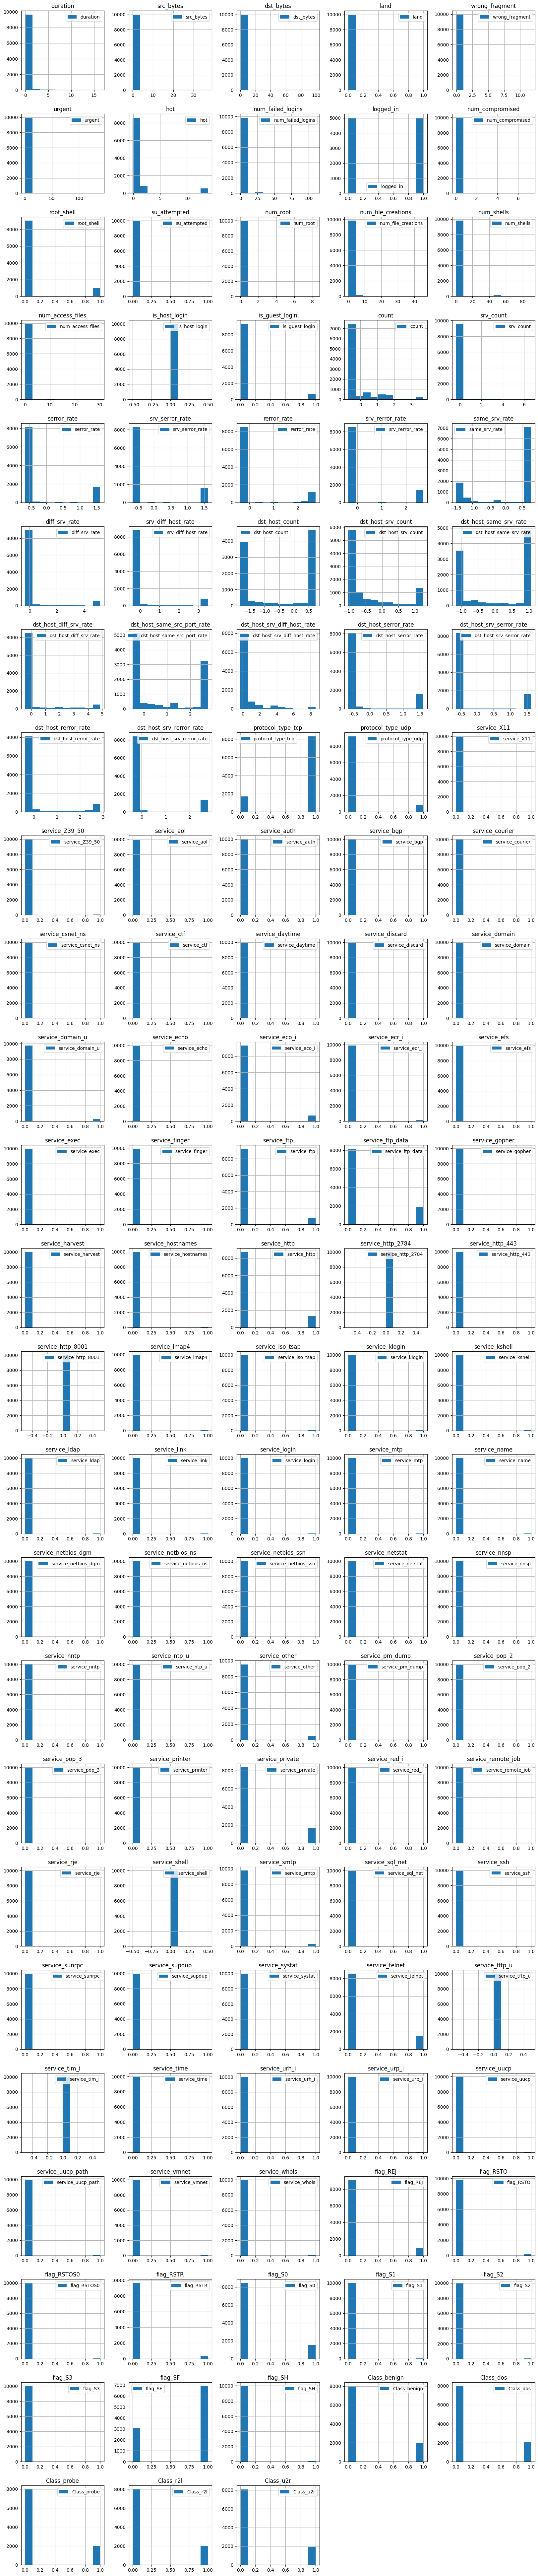

In [11]:
kdd_data = pd.read_csv('../artefacts/5/kdd_train.csv', index_col='index1').sample(10000, random_state=719)

from matplotlib import pyplot as plt

kdd_data.hist(layout=(25, 5), figsize=(20, 100), legend=True)
plt.show()

In [ ]:
def preprocess_iot(iot: pd.DataFrame):
    return iot


iot_train = pd.read_csv('../artefacts/3/iot_train.csv')
iot_train = preprocess_iot(iot_train)
iot_train.to_csv('../artefacts/5/iot_train.csv', index=False)

iot_test = pd.read_csv('../artefacts/3/iot_test.csv')
iot_test.to_csv('../artefacts/5/iot_test.csv', index=False)
